<a href="https://colab.research.google.com/github/semant/MachineLearning/blob/master/Computer_Vision_MultiClass_Classification_CNN_CFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision: Multi-class Classification
### Building a Convolutional Neural Network from scratch
### Keras: CIFAR10


### Introduction
CIFAR10 is a dataset of 32x32 color images, labeled over 10 categories which have been split into 50,000 training and 10,000 test images. In this project, a Convultion Neural Network was built from scratch.

### Optimizations

| Model | Optimizer | Layers | Layer 1 | Layer 2 | Layer 3 | Layer 4 | Layer 5 | Layer 6 | Layer 7 | Layer 8 | Layer 9 | Layer 10 | Layer 11 | Layer 12 | Layer 13 | Layer 14 | Layer 15 | Layer 16 | Error: Train | Error: Test | Change | Improvement | 
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 1 | AdaDelta | 16 | C2 32 | DO 0.2 | C2 32 | MP | C2 64 | DO 0.2 | C2 64 | MP | C2 128 | DO 0.2 | C2 128 | MP | F | DO 0.2 | D 1024 | DO 0.2 | 0.8435 | 0.7785 | Base | - | 
| 2 | SGD | 16 | C2 32 | DO 0.2 | C2 32 | MP | C2 64 | DO 0.2 | C2 64 | MP | C2 128 | DO 0.2 | C2 128 | MP | F | DO 0.2 | D 1024 | DO 0.2 | 0.7279 | 0.6958 | Optimizer | No | 
| 3 | RMSProp | 16 | C2 32 | DO 0.2 | C2 32 | MP | C2 64 | DO 0.2 | C2 64 | MP | C2 128 | DO 0.2 | C2 128 | MP | F | DO 0.2 | D 1024 | DO 0.2 | 0.1000 | 0.1000 | Optimizer | No |
| 4 | Adam | 16 | C2 32 | DO 0.2 | C2 32 | MP | C2 64 | DO 0.2 | C2 64 | MP | C2 128 | DO 0.2 | C2 128 | MP | F | DO 0.2 | D 1024 | DO 0.2 | 0.8466 | 0.7745 | Optimizer | Yes |

where:
- C2: Convolution 2D layer (3 x 3)
- D: Dense layer
- DO: Dropout layer
- F: Flatten layer
- MP: MaxPool layer


### Summary

A Convolution Neural Network architecture was created consisting of 16 layers with 32, 64, and 128 convolutional layers, 20% drop out layers, and one dense layer. Of the different optimizers evaluated, Adam gave the best result with training and testing accuracies of 84.7% and 77.5% respectively.


In [0]:
import keras

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from keras.models import Model, Sequential
from keras.layers import Input, Conv2D, MaxPool2D, UpSampling2D, Dropout, Flatten, Dense
from keras.utils import np_utils
from keras.optimizers import SGD, Adam, rmsprop
from keras.constraints import MaxNorm

### Importing datta

In [26]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape,  y_test.shape)
print(x_train.shape[0:], x_train.shape[1:])

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
(50000, 32, 32, 3) (32, 32, 3)


### Reshaping

As the training and test data have 0, 1, ... 9 as the unique output values, they were converted into 10 classes for training and testing purposes.

In [19]:
print(np.unique(y_train), np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9] [0 1 2 3 4 5 6 7 8 9]


In [20]:
num_classes = 10
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)
print("Reshaped Y:" , Y_train.shape, Y_test.shape)

Reshaped Y: (50000, 10) (10000, 10)


### Normalization

To speed up model parameter training, the input data needs to be normalized.

In [21]:
print("Pre: ", x_train.min(), x_train.max())

X_train = x_train.astype('float32')
X_test  = x_test.astype('float32')
X_train /= 255
X_test  /= 255

print("Post: ", X_train.min(), X_train.max())

Pre:  0 255
Post:  0.0 1.0


### Global Parameters

In [0]:
Num_Epochs = 50
Batch_Size = 32
Learning_Rate = 0.001

### Handling Overfitting

As CNN have a large number of parameters, overfitting is a serious possibility. To mitigate this scenario, several steps are taken:
+ Dropout: By randomly dropping a fraction of the weights, the parameters are trained quickly.
+ Kernel constraint: In conjunction with dropout, this constraint ensures that the weights are at or below a certain limit.


## Model 1
### Architecture: 16 layers
### Optimizer: Adadelta

In [0]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding = "same", activation = "relu", input_shape = X_train.shape[1:]))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), padding = "same", activation = "relu"))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(128, (3,3), padding = "same", activation = "relu"))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation = "relu", kernel_constraint = MaxNorm(3)))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation = 'softmax'))

##### Model 1: Compilation

In [0]:
model.compile(optimizer = 'adadelta',
                   loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

##### Model 1: Execution

In [0]:
cnn = model.fit(X_train, Y_train, 
                batch_size = Batch_Size, 
                epochs = Num_Epochs,
                validation_data = (X_test, Y_test),
                shuffle = True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/50





50000/50000 [==============================] - 37s 733us/step - loss: 1.6731 - acc: 0.3868 - val_loss: 1.3387 - val_acc: 0.5228
Epoch 2/50
50000/50000 [==============================] - 22s 443us/step - loss: 1.1536 - acc: 0.5889 - val_loss: 1.0788 - val_acc: 0.6193
Epoch 3/50
50000/50000 [==============================] - 22s 445us/step - loss: 0.9226 - acc: 0.6762 - val_loss: 1.0167 - val_acc: 0.6462
Epoch 4/50
50000/50000 [==============================] - 22s 445us/step - loss: 0.7937 - acc: 0.7242 - val_loss: 0.8066 - val_acc: 0.7231
Epoch 5/50
50000/50000 [==============================] - 22s 437us/step - loss: 0.7082 - acc: 0.7534 - val_loss: 0.7045 - val_acc: 0.7538
Epoch 6/50
50000/50000 [==============================] - 22s 436us/step - loss: 0.6516 - acc: 0.7744 - val_loss: 0.6876 - val_acc: 0.7622
Epoch 7/50
500

##### Model 1: Results

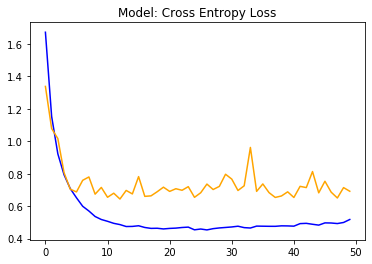

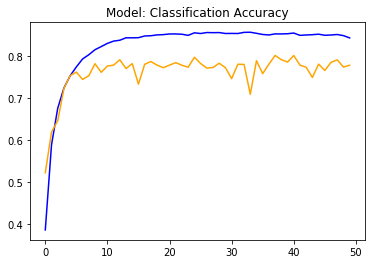

In [0]:
plt.title('Model: Cross Entropy Loss') 
plt.plot(cnn.history['loss'], color='blue', label='train')
plt.plot(cnn.history['val_loss'], color='orange', label='test')
plt.show()

# plot accuracy
plt.title('Model: Classification Accuracy')
plt.plot(cnn.history['acc'], color='blue', label='train')
plt.plot(cnn.history['val_acc'], color='orange', label='test')
plt.show()

## Model 2
### Architecture: 16 layers
### Optimizer: SGD

In [0]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding = "same", activation = "relu", input_shape = X_train.shape[1:]))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), padding = "same", activation = "relu"))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(128, (3,3), padding = "same", activation = "relu"))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation = "relu", kernel_constraint = MaxNorm(3)))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation = 'softmax'))

In [0]:
epochs = 100
lrate = 0.01 
decay = lrate/epochs 
sgd = SGD(lr = Learning_Rate, momentum = 0.9, decay = decay, nesterov = False) 
model.compile(loss = 'categorical_crossentropy', 
              optimizer = sgd, 
              metrics=['accuracy'])

In [0]:
cnn = model.fit(X_train, Y_train, 
                batch_size = Batch_Size, 
                epochs = Num_Epochs,
                validation_data = (X_test, Y_test),
                shuffle = True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 18s 355us/step - loss: 2.1163 - acc: 0.2127 - val_loss: 1.9366 - val_acc: 0.3113
Epoch 2/50
50000/50000 [==============================] - 17s 341us/step - loss: 1.8237 - acc: 0.3340 - val_loss: 1.7670 - val_acc: 0.3640
Epoch 3/50
50000/50000 [==============================] - 17s 340us/step - loss: 1.6560 - acc: 0.3993 - val_loss: 1.6326 - val_acc: 0.4204
Epoch 4/50
50000/50000 [==============================] - 17s 344us/step - loss: 1.5507 - acc: 0.4367 - val_loss: 1.5991 - val_acc: 0.4375
Epoch 5/50
50000/50000 [==============================] - 17s 343us/step - loss: 1.4711 - acc: 0.4695 - val_loss: 1.4116 - val_acc: 0.4984
Epoch 6/50
50000/50000 [==============================] - 17s 338us/step - loss: 1.4088 - acc: 0.4911 - val_loss: 1.4095 - val_acc: 0.5002
Epoch 7/50
50000/50000 [==============================] - 17s 341us/step - loss: 1.3613 - acc: 0.5100 - val_loss: 1.

#### Model 2: Visualization

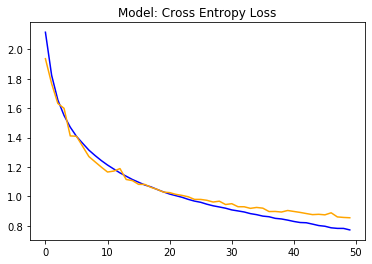

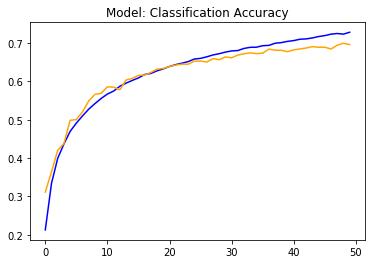

In [0]:
plt.title('Model: Cross Entropy Loss')
plt.plot(cnn.history['loss'], color='blue', label='train')
plt.plot(cnn.history['val_loss'], color='orange', label='test')
plt.show()

# plot accuracy
plt.title('Model: Classification Accuracy')
plt.plot(cnn.history['acc'], color='blue', label='train')
plt.plot(cnn.history['val_acc'], color='orange', label='test')
plt.show()

## Model 3
#### Architecture: 16 layers
#### Optimizer: RMSprop

In [0]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding = "same", activation = "relu", input_shape = X_train.shape[1:]))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), padding = "same", activation = "relu"))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(128, (3,3), padding = "same", activation = "relu"))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation = "relu", kernel_constraint = MaxNorm(3)))

model.add(Dropout(0.2))
model.add(Dense(num_classes, activation = 'softmax'))

In [0]:
epochs = 100
lrate = 0.01 
decay = lrate/epochs 
opt_rms = rmsprop(lr = Learning_Rate,
                  decay = 1e-6)
model.compile(loss = 'categorical_crossentropy', 
              optimizer = opt_rms,
              metrics = ['accuracy'])

In [0]:
cnn = model.fit(X_train, Y_train, 
                batch_size = Batch_Size, 
                epochs = Num_Epochs,
                validation_data = (X_test, Y_test),
                shuffle = True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 20s 403us/step - loss: 1.6217 - acc: 0.4157 - val_loss: 1.3821 - val_acc: 0.5115
Epoch 2/50
50000/50000 [==============================] - 19s 387us/step - loss: 1.1907 - acc: 0.5783 - val_loss: 1.2941 - val_acc: 0.5533
Epoch 3/50
50000/50000 [==============================] - 19s 387us/step - loss: 1.0499 - acc: 0.6367 - val_loss: 1.0015 - val_acc: 0.6551
Epoch 4/50
50000/50000 [==============================] - 20s 390us/step - loss: 1.0008 - acc: 0.6594 - val_loss: 1.1160 - val_acc: 0.6416
Epoch 5/50
50000/50000 [==============================] - 19s 385us/step - loss: 0.9810 - acc: 0.6705 - val_loss: 0.9783 - val_acc: 0.6739
Epoch 6/50
50000/50000 [==============================] - 19s 387us/step - loss: 0.9776 - acc: 0.6717 - val_loss: 0.9855 - val_acc: 0.6721
Epoch 7/50
50000/50000 [==============================] - 19s 385us/step - loss: 0.9937 - acc: 0.6691 - val_loss: 1.

#### Visualization

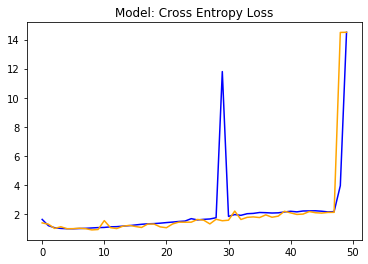

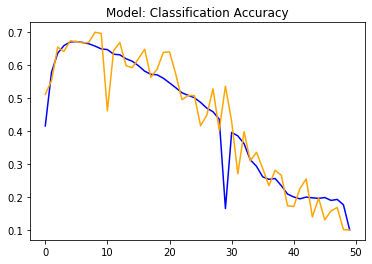

In [0]:
plt.title('Model: Cross Entropy Loss')
plt.plot(cnn.history['loss'], color='blue', label='train')
plt.plot(cnn.history['val_loss'], color='orange', label='test')
plt.show()

# plot accuracy
plt.title('Model: Classification Accuracy')
plt.plot(cnn.history['acc'], color='blue', label='train')
plt.plot(cnn.history['val_acc'], color='orange', label='test')
plt.show()

## Model 4
### Architecture: 16 layers
### Optimizer: Adam

In [0]:
# ARCHITECTURE
model = Sequential()

model.add(Conv2D(32, (3,3), padding = "same", activation = "relu", input_shape = X_train.shape[1:]))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), padding = "same", activation = "relu"))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(128, (3,3), padding = "same", activation = "relu"))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation = "relu", kernel_constraint = MaxNorm(3)))

model.add(Dropout(0.2))
model.add(Dense(num_classes, activation = 'softmax'))

# MODEL FIT AND EXECUTION
adam = Adam(lr = Learning_Rate)
model.compile(loss = 'categorical_crossentropy', 
              optimizer = adam,
              metrics = ['accuracy'])

cnn = model.fit(X_train, Y_train, 
                batch_size = Batch_Size, 
                epochs = Num_Epochs,
                validation_data = (X_test, Y_test),
                shuffle = True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 21s 428us/step - loss: 1.6591 - acc: 0.3789 - val_loss: 1.3312 - val_acc: 0.5073
Epoch 2/50
50000/50000 [==============================] - 21s 411us/step - loss: 1.2164 - acc: 0.5617 - val_loss: 1.1016 - val_acc: 0.6072
Epoch 3/50
50000/50000 [==============================] - 21s 415us/step - loss: 1.0302 - acc: 0.6336 - val_loss: 0.9435 - val_acc: 0.6682
Epoch 4/50
50000/50000 [==============================] - 21s 411us/step - loss: 0.9058 - acc: 0.6797 - val_loss: 0.8665 - val_acc: 0.7006
Epoch 5/50
50000/50000 [==============================] - 21s 410us/step - loss: 0.8209 - acc: 0.7104 - val_loss: 0.8075 - val_acc: 0.7139
Epoch 6/50
50000/50000 [==============================] - 21s 412us/step - loss: 0.7613 - acc: 0.7309 - val_loss: 0.7648 - val_acc: 0.7320
Epoch 7/50
50000/50000 [==============================] - 20s 409us/step - loss: 0.7177 - acc: 0.7504 - val_loss: 0.

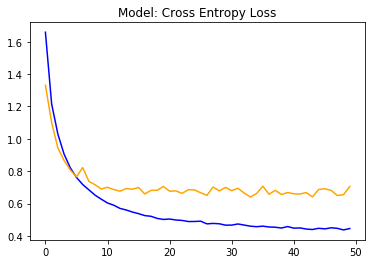

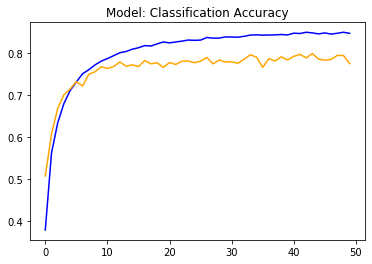

In [0]:
plt.title('Model: Cross Entropy Loss') 
plt.plot(cnn.history['loss'], color='blue', label='train')
plt.plot(cnn.history['val_loss'], color='orange', label='test')
plt.show()

# plot accuracy
plt.title('Model: Classification Accuracy')
plt.plot(cnn.history['acc'], color='blue', label='train')
plt.plot(cnn.history['val_acc'], color='orange', label='test')
plt.show()